In [3]:
import shap
from shap.datasets import iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

e:\Machine Learning and Data Science\SHAP-Projects\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# load the dataset
X,y = iris(display=True)

In [5]:
y = pd.Series(y)

In [6]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Length: 150, dtype: object

In [7]:
# split the data 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [8]:
print("train shape:",X_train.shape)
print("test shape:",X_test.shape)

train shape: (120, 4)
test shape: (30, 4)


In [9]:
y_train.value_counts(normalize=True)

setosa        0.333333
virginica     0.333333
versicolor    0.333333
Name: proportion, dtype: float64

In [10]:
y_test.value_counts(normalize=True)

setosa        0.333333
virginica     0.333333
versicolor    0.333333
Name: proportion, dtype: float64

In [11]:
# encode the target variable
le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [12]:
y_test

array([0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 0, 2,
       1, 2, 2, 1, 1, 0, 2, 0])

In [13]:
# fit the model into data

rf = RandomForestClassifier(n_estimators=10,max_depth=5)

rf.fit(X_train,y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",10
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y_t

In [14]:
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

In [15]:
# accuracy score
print("Train Accuracy: ",accuracy_score(y_train,y_pred_train))
print("Test Accuracy: ",accuracy_score(y_test,y_pred_test))

Train Accuracy:  1.0
Test Accuracy:  0.9333333333333333


In [16]:
# make an explainer 

explainer = shap.TreeExplainer(model=rf,data=X_train,model_output="probability")

In [ ]:
# base value
explainer.expected_value # sample for 100 rows automatically

array([0.319 , 0.3134, 0.3676])

In [20]:
# calculate the values manually

rf.predict_proba(X_train).mean(axis=0)

array([0.33333333, 0.33816667, 0.3285    ])

In [24]:
test_case = X_test.iloc[0:1,:]

prediction = rf.predict(test_case)
prediction_prob = rf.predict_proba(test_case)

In [25]:
prediction

array([0])

In [26]:
prediction_prob

array([[1., 0., 0.]])

In [27]:
le.inverse_transform(prediction)

array(['setosa'], dtype=object)

In [28]:
# calculate shapley values 

shap_values = explainer(test_case)

In [32]:
shap_values.shape

(1, 4, 3)

In [29]:
shap_values

.values =
array([[[ 0.06633333, -0.04016667, -0.02616667],
        [ 0.00666667, -0.00166667, -0.005     ],
        [ 0.17783334,  0.00863333, -0.18646667],
        [ 0.43016667, -0.2802    , -0.14996667]]])

.base_values =
array([[0.319 , 0.3134, 0.3676]])

.data =
array([[4.4, 3. , 1.3, 0.2]])

In [30]:
shap_values.base_values

array([[0.319 , 0.3134, 0.3676]])

In [31]:
explainer.expected_value

array([0.319 , 0.3134, 0.3676])

In [33]:
# water fall plot

shap_values

.values =
array([[[ 0.06633333, -0.04016667, -0.02616667],
        [ 0.00666667, -0.00166667, -0.005     ],
        [ 0.17783334,  0.00863333, -0.18646667],
        [ 0.43016667, -0.2802    , -0.14996667]]])

.base_values =
array([[0.319 , 0.3134, 0.3676]])

.data =
array([[4.4, 3. , 1.3, 0.2]])

In [36]:
shap_values[0,:,0]

.values =
array([0.06633333, 0.00666667, 0.17783334, 0.43016667])

.base_values =
np.float64(0.319)

.data =
array([4.4, 3. , 1.3, 0.2])

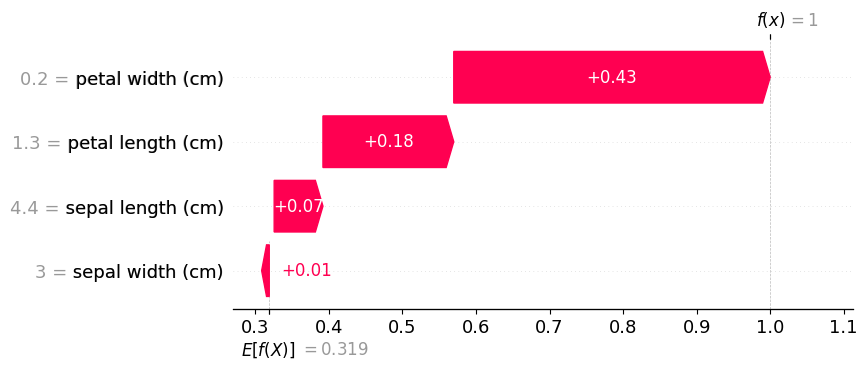

In [37]:
shap.waterfall_plot(shap_values[0,:,0])

In [38]:
import matplotlib.pyplot as plt

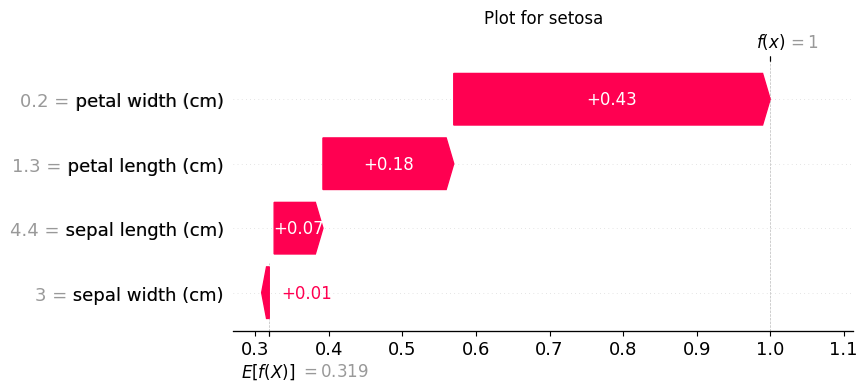

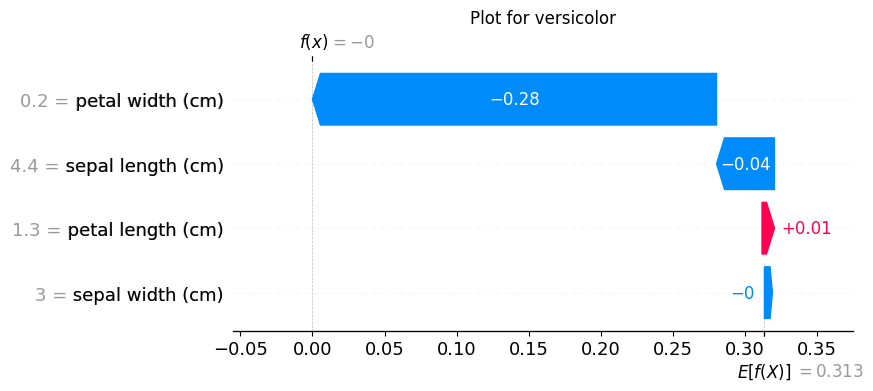

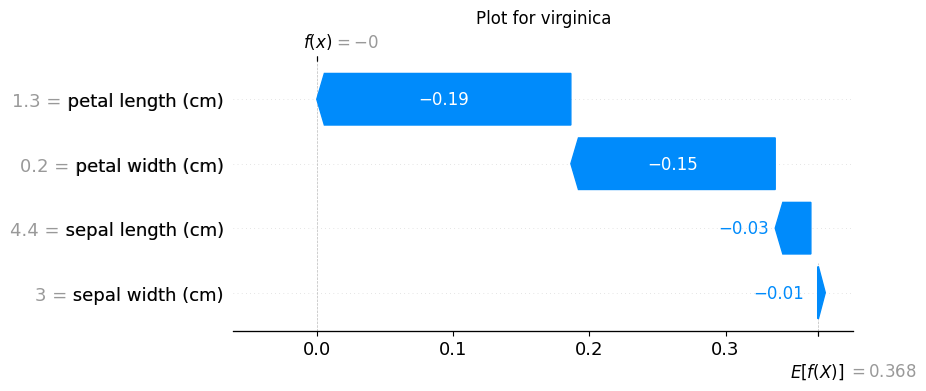

In [40]:
for i in range(len(le.classes_)):
    plt.title(f"Plot for {le.classes_[i]}")
    shap.waterfall_plot(shap_values[0,:,i])
    print("\n\n")